<a href="https://colab.research.google.com/github/bgyarbro/bible-text-generator/blob/master/generator_bible_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import os

In [2]:
!wget --no-check-certificate \
  https://raw.githubusercontent.com/bgyarbro/bible-text-generator/master/kjv-1769-clean.txt \
  -O /tmp/kjv-1769-clean.txt

--2020-08-04 02:36:40--  https://raw.githubusercontent.com/bgyarbro/bible-text-generator/master/kjv-1769-clean.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4200408 (4.0M) [text/plain]
Saving to: ‘/tmp/kjv-1769-clean.txt’

/tmp/kjv-1769-clean 100%[===================>]   4.00M  17.5MB/s    in 0.2s    

2020-08-04 02:36:42 (17.5 MB/s) - ‘/tmp/kjv-1769-clean.txt’ saved [4200408/4200408]



In [3]:
# reading Bible from file

lines = []
file = open("/tmp/kjv-1769-clean.txt")
lines.append(file.read())

In [4]:
lines_split = lines[0].split("\n")

In [5]:
lines_split[0:5]

['"\'\'"',
 '"In the beginning God created the heaven and the earth."',
 '"And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters."',
 '"And God said, Let there be light: and there was light."',
 '"And God saw the light, that it was good: and God divided the light from the darkness."']

In [6]:
lines = pd.DataFrame(lines_split, columns=['lines'])

In [7]:
lines.head()

,lines
0,"""''"""
1,"""In the beginning God created the heaven and t..."
2,"""And the earth was without form, and void; and..."
3,"""And God said, Let there be light: and there w..."
4,"""And God saw the light, that it was good: and ..."


In [8]:
lines = lines[lines.lines != '"\'\'"']

In [9]:
lines.head()

,lines
1,"""In the beginning God created the heaven and t..."
2,"""And the earth was without form, and void; and..."
3,"""And God said, Let there be light: and there w..."
4,"""And God saw the light, that it was good: and ..."
5,"""And God called the light Day, and the darknes..."


In [10]:
def clean_text(sentence):
    sentence = sentence.lower()

    sentence = re.sub(r"i'm", "i am", sentence)
    sentence = re.sub(r"i’m", "i am", sentence)

    sentence = re.sub(r"he's", "he is", sentence)
    sentence = re.sub(r"he’s", "he is", sentence)

    sentence = re.sub(r"she's", "she is", sentence)
    sentence = re.sub(r"she’s", "she is", sentence)

    sentence = re.sub(r"it's", "it is", sentence)
    sentence = re.sub(r"it’s", "it is", sentence)

    sentence = re.sub(r"that's", "that is", sentence)
    sentence = re.sub(r"that’s", "that is", sentence)

    sentence = re.sub(r"what's", "what is", sentence)
    sentence = re.sub(r"what’s", "what is", sentence)

    sentence = re.sub(r"where's", "where is", sentence)
    sentence = re.sub(r"where’s", "where is", sentence)

    sentence = re.sub(r"there's", "there is", sentence)
    sentence = re.sub(r"there’s", "there is", sentence)

    sentence = re.sub(r"who's", "who is", sentence)
    sentence = re.sub(r"who’s", "who is", sentence)

    sentence = re.sub(r"how's", "how is", sentence)
    sentence = re.sub(r"how’s", "how is", sentence)

    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"’ll", " will", sentence)

    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"’ve", " have", sentence)

    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"’re", " are", sentence)

    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"’d", " would", sentence)

    sentence = re.sub(r"won't", "will not", sentence)
    sentence = re.sub(r"won’t", "will not", sentence)

    sentence = re.sub(r"can't", "cannot", sentence)
    sentence = re.sub(r"can’t", "cannot", sentence)

    sentence = re.sub(r"n't", " not", sentence)
    sentence = re.sub(r"n’t", " not", sentence)

    sentence = re.sub(r"n'", "ng", sentence)
    sentence = re.sub(r"n’", "ng", sentence)

    sentence = re.sub(r"'bout", "about", sentence)
    sentence = re.sub(r"’bout", "about", sentence)

    sentence = re.sub(r"'til", "until", sentence)
    sentence = re.sub(r"’til", "until", sentence)

    sentence = re.sub(r"c'mon", "come on", sentence)
    sentence = re.sub(r"c’mon", "come on", sentence)
    
    sentence = re.sub("\n", "", sentence)

    sentence = re.sub("[-*/()\"’'#/@;:<>{}`+=~|.!?,]", "", sentence)
    
    return sentence

In [11]:
lines.lines = lines.lines.apply(lambda line: clean_text(line))

In [12]:
lines.head()

,lines
1,in the beginning god created the heaven and th...
2,and the earth was without form and void and da...
3,and god said let there be light and there was ...
4,and god saw the light that it was good and god...
5,and god called the light day and the darkness ...


In [13]:
lines.shape

(31102, 1)

In [14]:
lines.lines = lines.lines.apply(lambda line: line.split())

In [15]:
x_train = [line[:-1] for line in lines.lines]
y_train = [line[1:] for line in lines.lines]

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
tokenizer = Tokenizer()

In [18]:
tokenizer.fit_on_texts(lines.lines)

In [19]:
x_train = tokenizer.texts_to_sequences(x_train)
y_train = tokenizer.texts_to_sequences(y_train)

In [20]:
word2idx = tokenizer.word_index
idx2word = {value: key for key, value in word2idx.items()}

In [21]:
word2idx["<pad>"] = 0
idx2word[0] = "<pad>"

In [22]:
lengths = []

for sequence in x_train:
    lengths.append(len(sequence))
    
lengths = pd.Series(lengths)
lengths.describe()

count    31102.000000
mean        24.387917
std         11.079717
min          1.000000
25%         16.000000
50%         23.000000
75%         31.000000
max         89.000000
dtype: float64

In [23]:
maxlen = 90
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 1024
vocab_size

12698

In [24]:
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post', truncating='post')
y_train = pad_sequences(y_train, maxlen=maxlen, padding='post', truncating='post')

In [25]:
x_train

array([[   6,    1,  678, ...,    0,    0,    0],
       [   2,    1,  110, ...,    0,    0,    0],
       [   2,   27,   31, ...,    0,    0,    0],
       ...,
       [   2,   77,  121, ...,    0,    0,    0],
       [   7,   28, 5248, ...,    0,    0,    0],
       [   1,  478,    3, ...,    0,    0,    0]], dtype=int32)

In [26]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import GRU, Dense, Input, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [27]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, mask_zero=True))
model.add(GRU(units=1024, return_sequences=True))
model.add(Dense(vocab_size))

In [30]:
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [31]:
history = model.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
972/972 [==============================] - 211s 217ms/step - loss: 1.2307 - accuracy: 0.2312
Epoch 2/10
972/972 [==============================] - 210s 216ms/step - loss: 1.0070 - accuracy: 0.2951
Epoch 3/10
972/972 [==============================] - 210s 216ms/step - loss: 0.8489 - accuracy: 0.3497
Epoch 4/10
972/972 [==============================] - 210s 216ms/step - loss: 0.7147 - accuracy: 0.4174
Epoch 5/10
972/972 [==============================] - 210s 216ms/step - loss: 0.6090 - accuracy: 0.4824
Epoch 6/10
972/972 [==============================] - 209s 215ms/step - loss: 0.5252 - accuracy: 0.5427
Epoch 7/10
972/972 [==============================] - 212s 218ms/step - loss: 0.4586 - accuracy: 0.5939
Epoch 8/10
972/972 [==============================] - 213s 219ms/step - loss: 0.4064 - accuracy: 0.6344
Epoch 9/10
972/972 [==============================] - 212s 219ms/step - loss: 0.3666 - accuracy: 0.6676
Epoch 10/10
972/972 [==============================] - 212s 218m

In [ ]:
#model.save("model.h5")
#model = load_model("model.h5")

In [32]:
def generate(word):
    word = clean_text(word)
    inputs = np.zeros((1, 1))
    inputs[0, 0] = word2idx[word]
    count = 1
    while count <= 100:
        pred = model.predict(inputs)
        word = np.argmax(pred)
        if word >= vocab_size:
            word = vocab_size - 1

        inputs[0, 0] = word
        
        print(idx2word[word], end=" ")
        count += 1


In [39]:
generate("thy")

watchmen to whom resist the lord how shall not as cold and the lord how shall not as cold and the lord how shall not as cold and the lord how shall not as cold and the lord how shall not as cold and the lord how shall not as cold and the lord how shall not as cold and the lord how shall not as cold and the lord how shall not as cold and the lord how shall not as cold and the lord how shall not as cold and the lord how shall not as cold and 

In [34]:
generate("jesus")

answered and the lord how shall not as cold and the lord how shall not as cold and the lord how shall not as cold and the lord how shall not as cold and the lord how shall not as cold and the lord how shall not as cold and the lord how shall not as cold and the lord how shall not as cold and the lord how shall not as cold and the lord how shall not as cold and the lord how shall not as cold and the lord how shall not as cold and the lord 

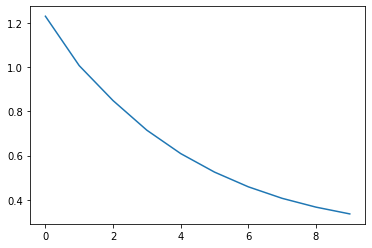

In [35]:
import matplotlib.pyplot as plt

plt.plot(range(10), history.history['loss'])